In [1]:
import os
import pandas as pd
import plotly.graph_objects as go

%matplotlib inline

In [2]:
def load_prices(data_dir='data'):
    series = []
    for f in os.listdir(data_dir):
        if f.endswith('csv'):
            series.append(pd.read_csv(os.path.join(data_dir, f), index_col=0, parse_dates=['time']))
    return pd.concat(series).drop_duplicates().sort_values('time').reset_index(drop=True)

In [9]:
df = load_prices()

<AxesSubplot:xlabel='time'>

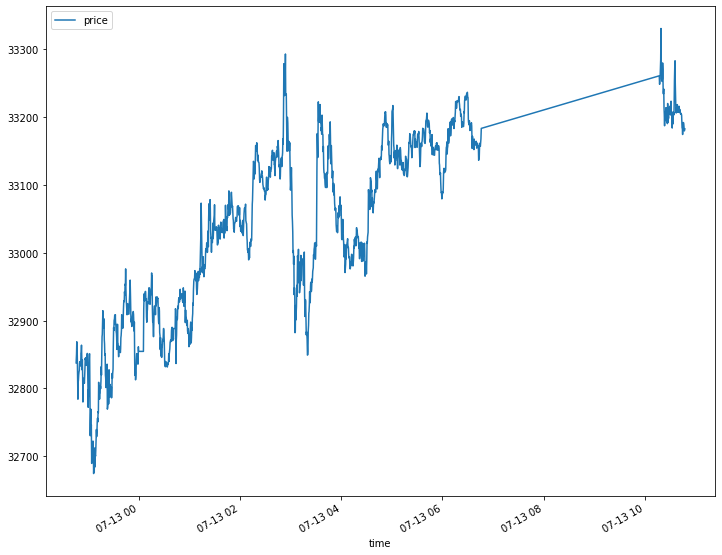

In [10]:
df.plot('time', 'price', figsize=(12, 10))

In [11]:
candles = df.resample('H', on='time').price.ohlc()

In [12]:
fig = go.Figure(data=[go.Candlestick(
    x=candles.index,
    open=candles['open'],
    high=candles['high'],
    low=candles['low'],
    close=candles['close'])],
)
# fig.update_layout(xaxis_rangeslider_visible=False)
fig.show()